### Отбор наиболее важных признаков при помощи метода случайного леса

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from russian_names import russian_names

In [2]:
df_pr = pd.read_csv('data_processed.csv')
df_pr.head(10)

,Unnamed: 0,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,0,1,8,0.555556,2,1,13,4,6,10,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,1
1,1,1,2,0.111111,11,1,1,3,4,4,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.000000,0
2,2,1,1,0.555556,5,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.000000,1
3,3,1,8,0.222222,15,1,23,27,6,4,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.000000,0
4,4,2,12,0.111111,3,1,22,28,10,10,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.000000,0
5,5,2,12,0.111111,17,12,22,27,10,8,...,0.192308,0.628193,0.0,0.0,0.217391,0.515152,0.25,0.619231,0.416667,0
6,6,1,1,0.111111,12,1,13,28,8,11,...,0.269231,0.704636,0.0,0.0,0.347826,0.242424,0.40,0.772423,0.000000,0
7,7,1,9,0.444444,11,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.217391,0.151515,0.00,0.000000,0.000000,1
8,8,1,1,0.333333,10,1,1,1,10,10,...,0.230769,0.735099,0.0,0.0,0.260870,0.212121,0.30,0.761538,0.000000,0
9,9,1,1,0.111111,10,1,1,14,5,8,...,0.192308,0.603974,0.0,0.0,0.260870,0.424242,0.10,0.726923,0.000000,1


In [3]:
df_pr = df_pr.drop('Unnamed: 0', axis=1)
df_pr

,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,1,8,0.555556,2,1,13,4,6,10,1,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,1
1,1,2,0.111111,11,1,1,3,4,4,1,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0
2,1,1,0.555556,5,1,22,27,10,10,1,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,1
3,1,8,0.222222,15,1,23,27,6,4,1,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0
4,2,12,0.111111,3,1,22,28,10,10,0,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,0.666667,15,1,1,1,6,5,0,...,0.192308,0.720530,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0
4420,1,1,0.222222,15,1,1,1,10,10,1,...,0.230769,0.635762,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,1
4421,1,1,0.111111,12,1,22,27,10,10,1,...,0.269231,0.790066,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,1
4422,1,1,0.111111,9,1,22,27,8,5,1,...,0.192308,0.731126,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0


Разделение на 4 выборки: 70%, 15%, 10%, 5%.

In [4]:
X = df_pr.copy()
# Отделить целевую переменную и записать ее в y
X = X.drop('Target', axis=1)
y = df_pr['Target']

In [14]:
# Делим на 80 и 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# От train отделяем 1/8 => train - 70%, val - 10%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

In [16]:
# От test отделяем 1/4 => test - 15%, new - 5%
X_test, X_new, y_test, y_new = train_test_split(X_test, y_test, test_size=0.25, random_state=42, stratify=y_test)

In [17]:
# Проверка
splits = {
    'Обучающая': X_train,
    'Тестовая': X_test,
    'Валидационная': X_val,
    'Новые данные': X_new,
}

for name, split in splits.items():
    n = len(split)
    perc = n / len(X) * 100
    print(f'{name}: {n} строк, {perc:.1f} %')

Обучающая: 3096 строк, 70.0 %
Тестовая: 663 строк, 15.0 %
Валидационная: 443 строк, 10.0 %
Новые данные: 222 строк, 5.0 %


In [18]:
clf = RandomForestClassifier(n_estimators=100)
# Обучение модели
clf.fit(X_train,y_train)
# Вынести отсортированное влияние признаков
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Units 2 approved           0.158768
Units 2 grade              0.137118
Units 1 approved           0.097383
Units 1 grade              0.075776
Tuition fees up to date    0.066939
Age at enrollment          0.050823
Units 2 evaluations        0.042718
Course                     0.039140
Father's occupation        0.034120
Units 1 evaluations        0.032174
Mother's occupation        0.028229
Application mode           0.026075
Mother's qualification     0.025771
Father's qualification     0.025565
Units 1 enrolled           0.025237
Units 2 enrolled           0.022799
Debtor                     0.021186
Application order          0.016598
Scholarship holder         0.014798
Gender                     0.012583
Displaced                  0.009360
Previous qualification     0.007725
Units 1 credited           0.007240
Units 2 credited           0.006499
Units 2 non_eval           0.006306
Units 1 non_eval           0.004919
Marital status             0.004151
dtype: float64

Визуализация важности признаков

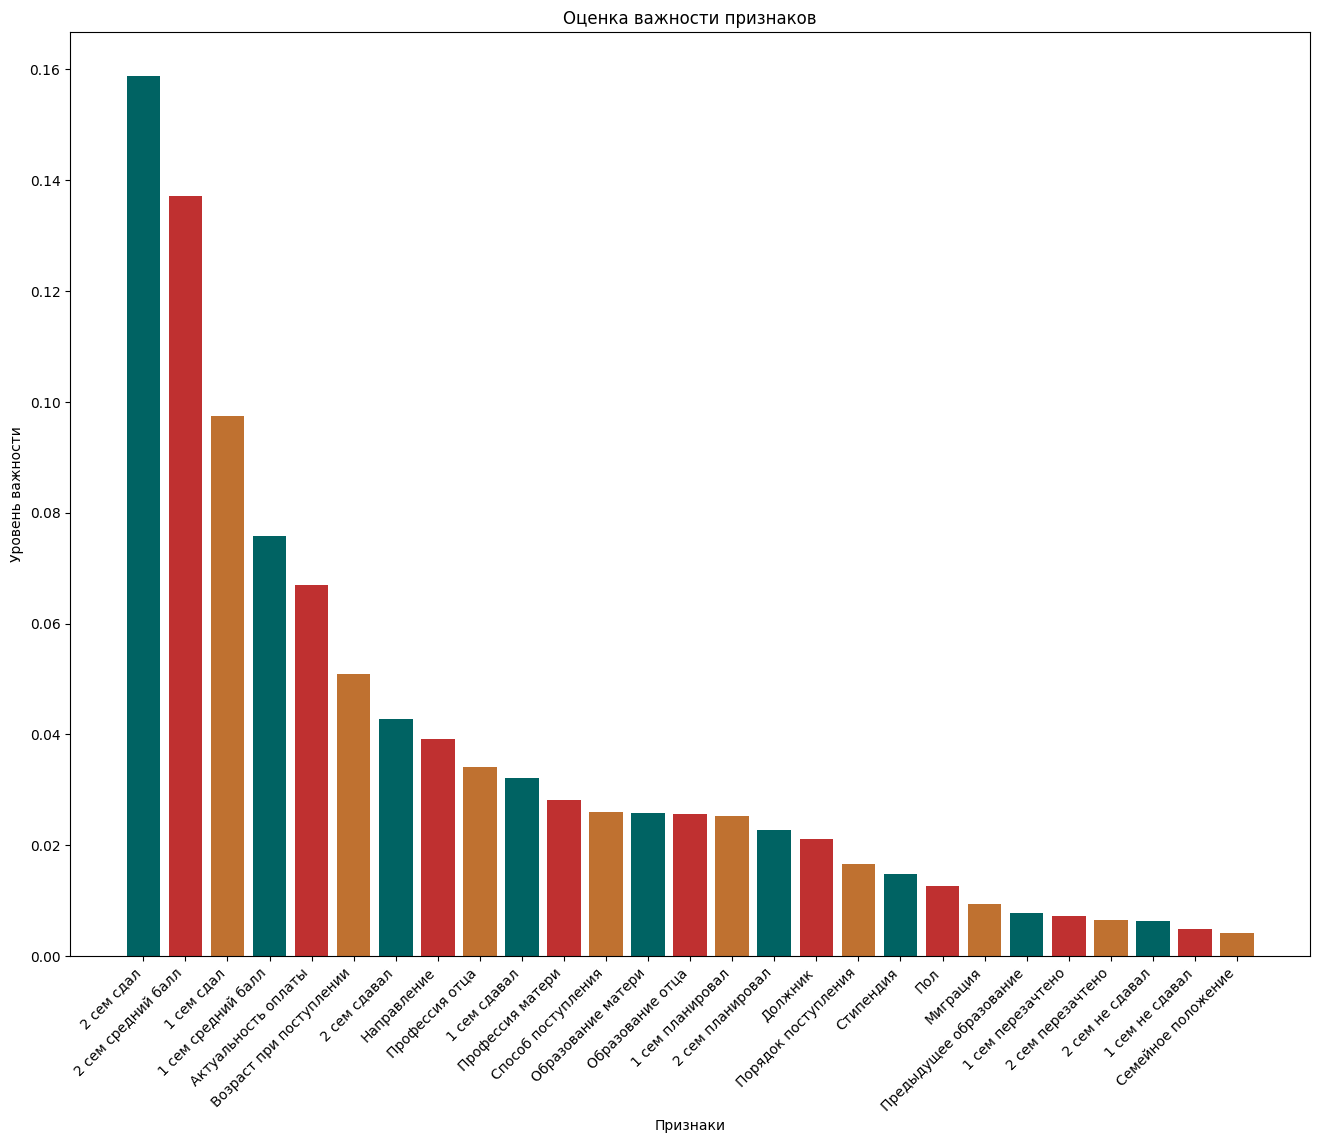

In [19]:
color=['#006363', '#BF3030', '#BF7130']
labels = [russian_names[column] for column in feature_imp.index]

plt.figure(figsize=(16,12))
plt.bar(feature_imp.index, feature_imp, color=color)

plt.title('Оценка важности признаков')
plt.xlabel('Признаки')
plt.ylabel('Уровень важности')

plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')

plt.show()

Удаляем ненужные признаки из всех трех выборок

In [20]:
list_to_drop = ['Displaced', 'Previous qualification', 'Units 2 credited', 'Units 1 credited',
                'Units 2 non_eval', 'Units 1 non_eval', 'Marital status']

In [21]:
X_train = X_train.drop(columns=list_to_drop)
X_test = X_test.drop(columns=list_to_drop)
X_val = X_val.drop(columns=list_to_drop)

### Обучение леса деревьев

In [26]:
# Классификатор на 300 деревьев для большей точности
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
# Предсказание меток классов
y_pred = clf.predict(X_val)

# Основные метрики
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       301
           1       0.83      0.66      0.74       142

    accuracy                           0.85       443
   macro avg       0.84      0.80      0.82       443
weighted avg       0.85      0.85      0.84       443



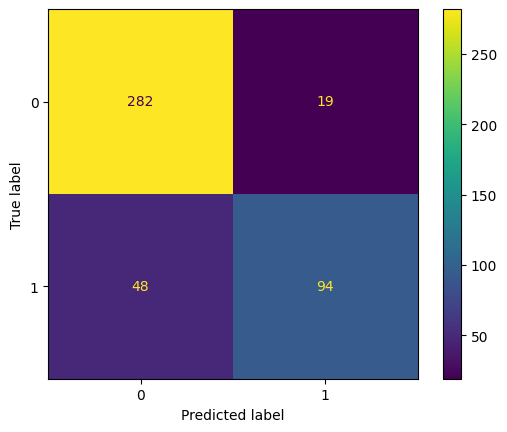

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
ax.plot()
plt.show()